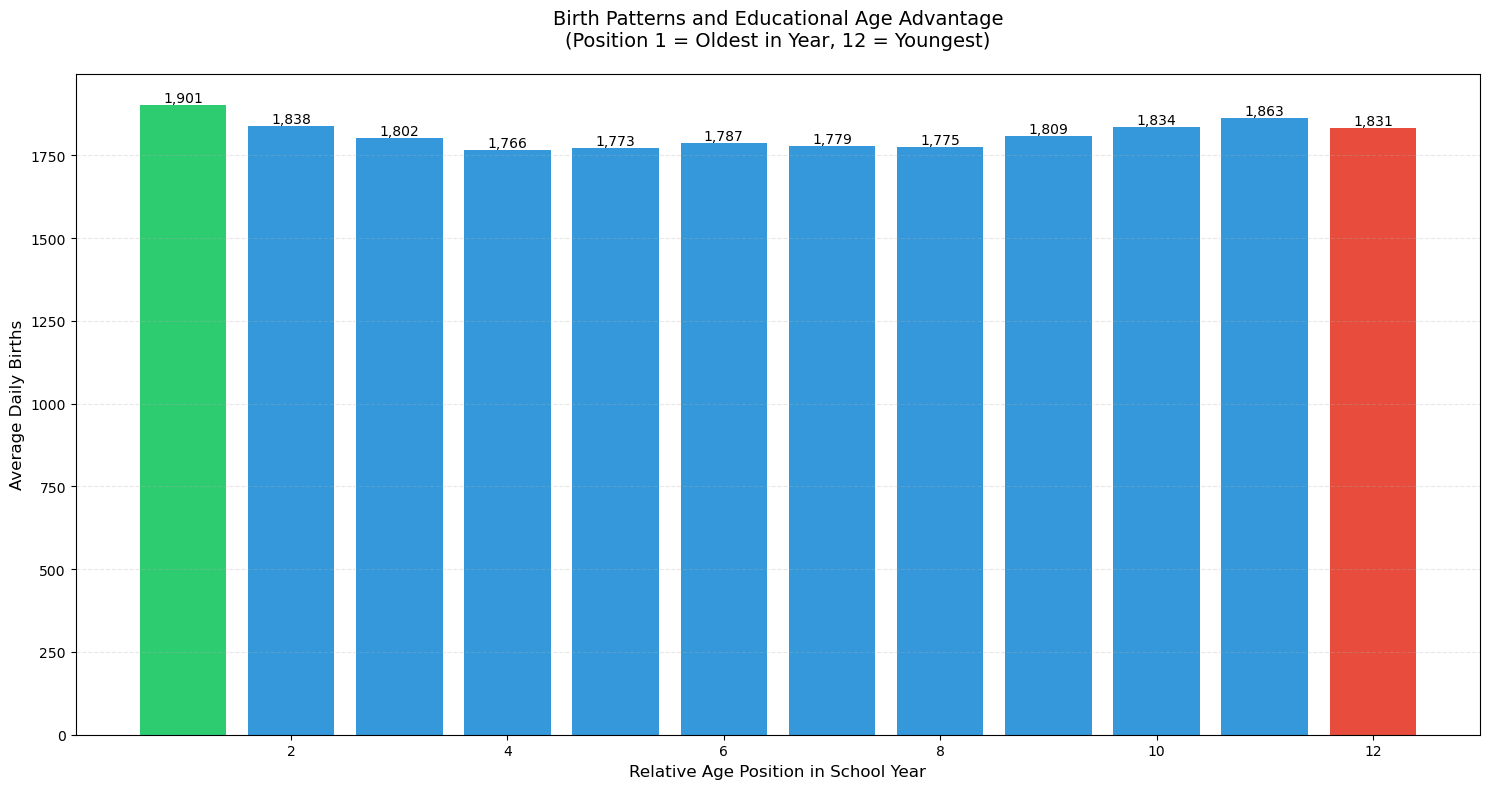

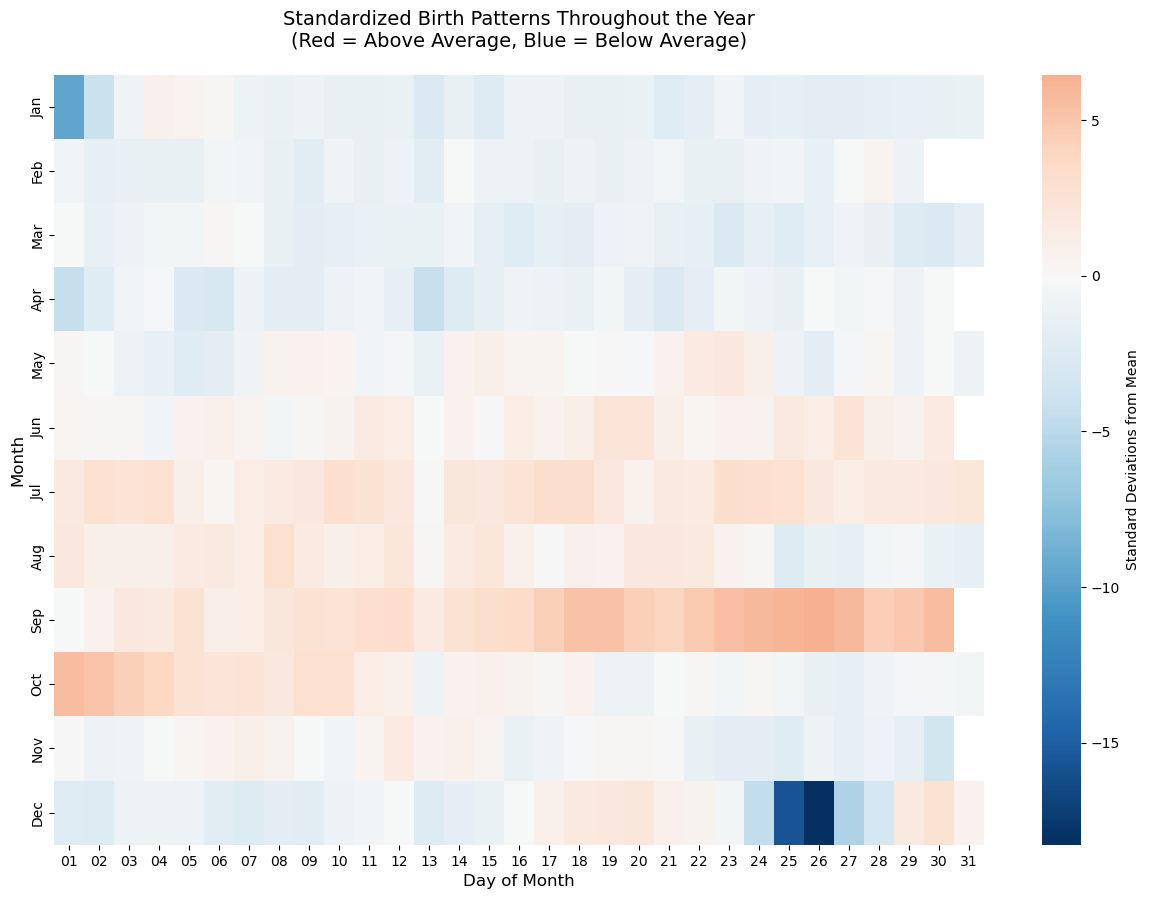


Comprehensive Birth Pattern Analysis

1. Statistical Significance of Monthly Patterns:
Month 1: Z-score = -0.69 ns
Month 2: Z-score = -0.44 ns
Month 3: Z-score = -0.58 ns
Month 4: Z-score = -0.64 ns
Month 5: Z-score = -0.08 ns
Month 6: Z-score = 0.36 ns
Month 7: Z-score = 0.85 ns
Month 8: Z-score = 0.31 ns
Month 9: Z-score = 1.49 ns
Month 10: Z-score = 0.42 ns
Month 11: Z-score = -0.19 ns
Month 12: Z-score = -0.80 ns

2. Academic Quarter Birth Probabilities:
                  probability  relative_chance
academic_quarter                              
Q1 (Oldest)             0.336            0.991
Q2                      0.244            0.966
Q3                      0.165            0.973
Q4 (Youngest)           0.255            1.000

3. Educational Advantage Analysis:
Probability of being among oldest (Q1): 33.6%
Probability of being among youngest (Q4): 25.5%
Relative chance (Oldest vs Youngest): 1.31x

4. Typical Class Composition (size = 30):
Expected oldest quarter students: 10.

/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_42204/1472158402.py:188: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_probs = df.groupby('academic_quarter').agg(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats

# Redefine the prepare_data function
def prepare_data(file_path):
    """
    Prepare birth data with additional educational context columns
    """
    df = pd.read_csv(file_path)
    
    # Split the date column and handle month conversion
    df[['day', 'month']] = df['date'].str.split('-', expand=True)
    
    # Create month number mapping
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Add educational context columns
    df['month_num'] = df['month'].map(month_map)
    df['school_entry_status'] = df['month_num'].apply(
        lambda x: 'Oldest in Year' if x == 9
        else ('Youngest in Year' if x == 8
        else 'Middle of Year')
    )
    
    # Calculate relative age position (1-12, where 1 is oldest in year)
    df['relative_age_position'] = df['month_num'].apply(
        lambda x: (x - 9) % 12 + 1
    )
    
    return df


def plot_educational_impact(df):
    """
    Create a visualization focusing on educational implications
    """
    plt.figure(figsize=(15, 8))
    
    # Calculate average births by relative age position
    age_stats = df.groupby('relative_age_position')['average'].mean()
    
    # Create color scheme based on educational advantage
    colors = ['#2ecc71' if x == 1 else '#e74c3c' if x == 12 
             else '#3498db' for x in range(1, 13)]
    
    # Plot bars
    bars = plt.bar(range(1, 13), age_stats, color=colors)
    
    # Customize plot
    plt.title('Birth Patterns and Educational Age Advantage\n(Position 1 = Oldest in Year, 12 = Youngest)',
              fontsize=14, pad=20)
    plt.xlabel('Relative Age Position in School Year', fontsize=12)
    plt.ylabel('Average Daily Births', fontsize=12)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom')
    
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    return plt

def calculate_educational_statistics(df):
    """
    Calculate statistics relevant to educational impact
    """
    # Group by school entry status
    edu_stats = df.groupby('school_entry_status').agg({
        'average': ['mean', 'std', 'count']
    }).round(2)
    
    # Calculate percentage differences from middle group
    middle_mean = edu_stats.loc['Middle of Year', ('average', 'mean')]
    edu_stats['relative_advantage'] = (
        (edu_stats[('average', 'mean')] - middle_mean) / middle_mean * 100
    ).round(2)
    
    return edu_stats

def print_educational_analysis(df):
    """
    Print comprehensive analysis of birth patterns' educational implications
    """
    edu_stats = calculate_educational_statistics(df)
    
    print("\nEducational Impact Analysis")
    print("=" * 50)
    
    print("\n1. Birth Pattern Impact on School Entry:")
    print(f"Oldest in Year (September): {edu_stats.loc['Oldest in Year', ('average', 'mean')]:,.0f} average daily births")
    print(f"Youngest in Year (August): {edu_stats.loc['Youngest in Year', ('average', 'mean')]:,.0f} average daily births")
    
    print("\n2. Relative Advantage:")
    for status in edu_stats.index:
        diff = edu_stats.loc[status, 'relative_advantage']
        print(f"{status}: {diff:+.1f}% compared to year average")
    
    # Calculate class size implications
    sept_aug_ratio = (
        edu_stats.loc['Oldest in Year', ('average', 'mean')] /
        edu_stats.loc['Youngest in Year', ('average', 'mean')]
    )
    
    print("\n3. Class Size Implications:")
    print(f"September to August ratio: {sept_aug_ratio:.2f}")
    print(f"In a class of 30, this means approximately:")
    print(f"- {30 * edu_stats.loc['Oldest in Year', ('average', 'mean')] / edu_stats['average', 'mean'].mean():.1f} September-born students")
    print(f"- {30 * edu_stats.loc['Youngest in Year', ('average', 'mean')] / edu_stats['average', 'mean'].mean():.1f} August-born students")
    
def calculate_advanced_statistics(df):
    """
    Calculate advanced statistics including probabilities and relative chances
    """
    # Calculate daily probabilities
    total_births = df['average'].sum()
    df['probability'] = df['average'] / total_births
    
    # Monthly probability aggregation
    monthly_stats = df.groupby('month_num').agg({
        'average': ['mean', 'std', 'sum'],
        'probability': ['mean', 'sum']
    }).round(4)
    
    # Calculate Z-scores for each month
    monthly_means = df.groupby('month_num')['average'].mean()
    overall_mean = df['average'].mean()
    overall_std = df['average'].std()
    monthly_zscores = (monthly_means - overall_mean) / overall_std
    
    return monthly_stats, monthly_zscores

def plot_advanced_heatmap(df):
    """
    Create an advanced heatmap showing standardized birth patterns
    """
    plt.figure(figsize=(15, 10))
    
    # Create pivot table with normalized values
    pivot_data = df.pivot_table(
        values='average', 
        index='month_num',
        columns='day',
        aggfunc='mean'
    )
    
    # Normalize the data
    normalized_data = (pivot_data - pivot_data.mean().mean()) / pivot_data.std().std()
    
    # Create heatmap with diverging colormap
    sns.heatmap(normalized_data, 
                cmap='RdBu_r',
                center=0,
                cbar_kws={'label': 'Standard Deviations from Mean'},
                xticklabels=True,
                yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.title('Standardized Birth Patterns Throughout the Year\n(Red = Above Average, Blue = Below Average)',
              fontsize=14, pad=20)
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel('Month', fontsize=12)
    
    return plt

# Define the fixed version of the `calculate_educational_probabilities` function

def calculate_educational_probabilities(df):
    """
    Calculate probabilities related to educational advantage (fixed version)
    """
    # Create academic quarters
    df['academic_quarter'] = pd.qcut(df['relative_age_position'], 
                                      q=4, 
                                      labels=['Q1 (Oldest)', 'Q2', 'Q3', 'Q4 (Youngest)'])
    
    # Correct aggregation method to avoid SpecificationError
    quarter_probs = df.groupby('academic_quarter').agg(
        mean_births=('average', 'mean'),
        total_births=('average', 'sum'),
        days_in_quarter=('average', 'count')
    )
    
    # Calculate probabilities and relative chances
    total_births = quarter_probs['total_births'].sum()
    quarter_probs['probability'] = quarter_probs['total_births'] / total_births
    
    youngest_births = quarter_probs.loc['Q4 (Youngest)', 'mean_births']
    quarter_probs['relative_chance'] = quarter_probs['mean_births'] / youngest_births
    
    return quarter_probs


def print_comprehensive_analysis(df):
    """
    Print comprehensive statistical analysis of birth patterns
    """
    # Calculate all statistics
    monthly_stats, monthly_zscores = calculate_advanced_statistics(df)
    quarter_probs = calculate_educational_probabilities(df)
    
    print("\nComprehensive Birth Pattern Analysis")
    print("=" * 60)
    
    print("\n1. Statistical Significance of Monthly Patterns:")
    for month in range(1, 13):
        zscore = monthly_zscores[month]
        pval = 2 * (1 - stats.norm.cdf(abs(zscore)))
        significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
        print(f"Month {month}: Z-score = {zscore:.2f} {significance}")
    
    print("\n2. Academic Quarter Birth Probabilities:")
    print(quarter_probs[['probability', 'relative_chance']].round(3))
    
    print("\n3. Educational Advantage Analysis:")
    oldest_prob = quarter_probs.loc['Q1 (Oldest)', 'probability']
    youngest_prob = quarter_probs.loc['Q4 (Youngest)', 'probability']
    
    print(f"Probability of being among oldest (Q1): {oldest_prob:.1%}")
    print(f"Probability of being among youngest (Q4): {youngest_prob:.1%}")
    print(f"Relative chance (Oldest vs Youngest): {oldest_prob/youngest_prob:.2f}x")
    
    # Calculate classroom implications
    class_size = 30
    expected_oldest = class_size * quarter_probs.loc['Q1 (Oldest)', 'probability']
    expected_youngest = class_size * quarter_probs.loc['Q4 (Youngest)', 'probability']
    
    print(f"\n4. Typical Class Composition (size = {class_size}):")
    print(f"Expected oldest quarter students: {expected_oldest:.1f}")
    print(f"Expected youngest quarter students: {expected_youngest:.1f}")

    return monthly_stats, quarter_probs

if __name__ == "__main__":
    # Load and analyze data
    df = prepare_data('data.csv')
    
    # Create educational impact visualization
    edu_plot = plot_educational_impact(df)
    plt.show()
    edu_plot.savefig('Figures/educational_impact.png', bbox_inches='tight', dpi=300)
    
    edu_plot.close()
    
    
    # Generate and save heatmap
    heatmap = plot_advanced_heatmap(df)
    plt.show()
    heatmap.savefig('Figures/birth_patterns_heatmap.png', bbox_inches='tight', dpi=300)
    heatmap.close()
    
    monthly_stats, quarter_probs = print_comprehensive_analysis(df)


In [15]:
# Load the Excel file
file_path = "birthssummary2022refreshedpopulations.xlsx"

# Read the specific sheet/table - adjust the sheet_name if needed
# You might need to use sheet_name="Table 4" or the appropriate sheet name
df = pd.read_excel(file_path, sheet_name="Table_4", skiprows=6)

# Clean column names - assuming first row contains month names
# This depends on your exact Excel structure
df.columns = [col.strip().replace('"', '').split('\n')[-1] if isinstance(col, str) else col 
              for col in df.columns]

df


,Year,Total,January,February,March,April,May,June,July,August,September,October,November,December
0,2022,605479,49711,46349,51230,48376,51245,49833,52042,52123,52180,52845,50356,49189
1,2021,624828,47742,46258,52481,50278,51329,52204,55385,54287,55296,55705,52498,51365
2,2020,613936,52804,48317,51080,49337,52094,51495,53515,51662,53079,53624,49638,47291
3,2019,640370,53677,48203,52880,51148,55108,53539,56440,55359,55164,55281,51922,51649
4,2018,657076,56173,48792,53875,52639,56599,54968,56824,56719,56145,56663,54037,53642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1942,651503,52070,47451,56797,55007,57159,56144,55708,56110,55022,54607,51024,54404
81,1941,579091,48889,44708,49406,47833,49550,45697,48318,49417,50570,49172,46158,49373
82,1940,590120,50281,49846,53583,52340,53100,47749,49459,49217,50516,46133,41560,46336
83,1939,614479,51350,46990,54389,54127,56337,52662,53515,51338,50605,48832,46025,48309


In [28]:
# Identify the index of the year 1980 in your dataframe
year_1980_index = df[df['Year'] == 1980].index[0]

# Extract data from 1980 onwards
df_1980_onwards = df.loc[:year_1980_index]  # Since years are in descending order

# Calculate percentages for each month in each year
percentage_df = pd.DataFrame()
percentage_df['Year'] = df_1980_onwards['Year']

# Calculate percentages for each month
for month in df.columns[2:14]:  # Skip Year and Total columns
    percentage_df[month] = (df_1980_onwards[month] / df_1980_onwards['Total'] * 100).round(1)

# Calculate average percentage for all years from 1980-2022
avg_percentages = percentage_df.iloc[:, 2:14].mean().round(1)  # Skip Year column

# Print the results
print("Average monthly birth percentages (1980-2022):")
for i, (month, percentage) in enumerate(zip(df.columns[2:14], avg_percentages)):
    print(f"{month}: {percentage}%")

# Create a list for Manim visualization
population_distribution = avg_percentages.tolist()
print("\nFor Manim visualization (1980-2022 average):")
print(f"population_distribution = {population_distribution}")

# Optional: Count the number of years included
num_years = len(df_1980_onwards)
print(f"\nAverage based on {num_years} years of data (1980-2022)")

Average monthly birth percentages (1980-2022):
January: 7.6%
February: 8.4%
March: 8.1%
April: 8.6%
May: 8.4%
June: 8.7%
July: 8.6%
August: 8.6%
September: 8.5%
October: 8.1%
November: 8.1%

For Manim visualization (1980-2022 average):
population_distribution = [7.6, 8.4, 8.1, 8.6, 8.4, 8.7, 8.6, 8.6, 8.5, 8.1, 8.1]

Average based on 43 years of data (1980-2022)


In [31]:
df.columns[2:14]

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')